In [ ]:
# Import the Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
canva = pd.read_excel('/content/Canva_reviews.xlsx')

canva.shape

(1500, 13)

In [ ]:
canva.head()

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaT,Negative,others,bug_app_crash
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28,Negative,others,bug_other


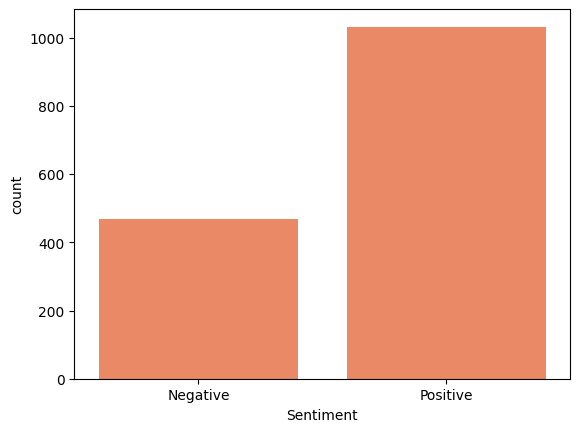

In [ ]:
# Lets look into the Sentiments
sns.countplot(x = "Sentiment", data = canva, color = "coral")
plt.show()

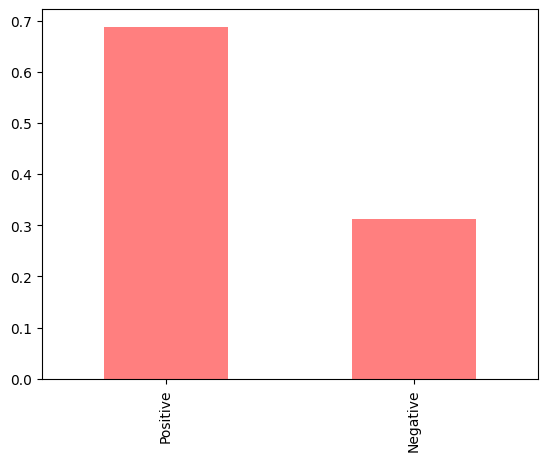

In [ ]:
canva.Sentiment.value_counts(normalize = True).plot(kind = "bar",
                                                    alpha = 0.5,
                                                    color=  "red")
plt.show()

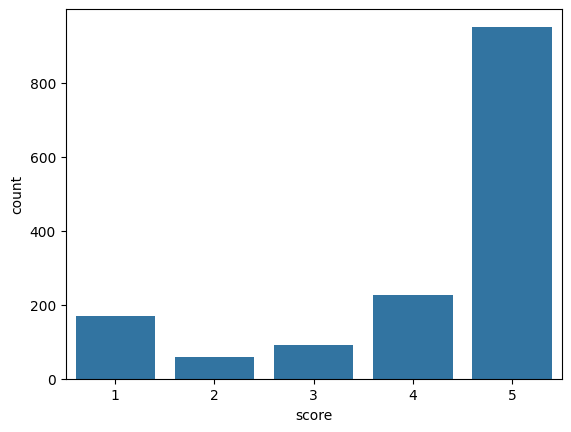

In [ ]:
# lets look into scores/ratings....

sns.countplot(x = "score", data = canva)
plt.show()

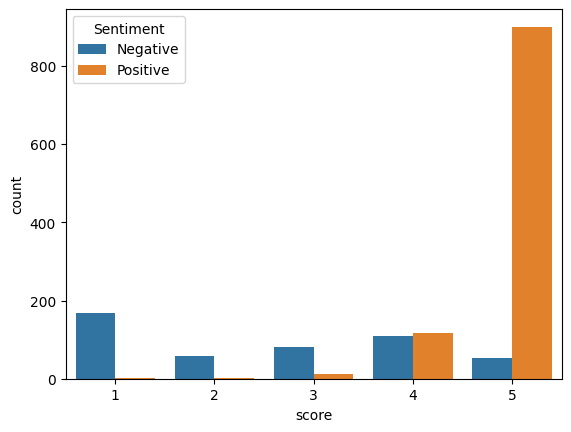

In [ ]:
# lets try to relate the rating with the sentiment

sns.countplot(x = "score", data = canva, hue = "Sentiment")
plt.show()

## NLP Pipeline

* Data Acquistion: through webscraping, inside the company(warehouse/databases/datalakes), apis, external sources and generate synthetic data.

* Text cleaning: HTML tag Removal, Special Character Removal, Converting into Lowercase, stopwords, spelling check, Tokenization etc.

* Advanced Processing: Stemming/Lemmatization, POS Tagging, NER, Parsing etc.

* Feature Engineering/Extraction: n-grams, One Hot Encoding (Bag of Words), Tf IDF and Word2Vector.

* Modeling & Evaulation

In [ ]:
# Lets clean the text

# lets generate the length of the text and word_len
canva["text_len"] = canva.review.apply(len)

# lets generate the word_len
canva["word_len"] = canva.review.apply(lambda x:len(str(x).split()))

In [ ]:
canva.text_len.describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: text_len, dtype: float64

In [ ]:
canva.word_len.describe()

count    1500.000000
mean       16.266667
std        10.851085
min         3.000000
25%        10.000000
50%        14.000000
75%        19.000000
max        98.000000
Name: word_len, dtype: float64

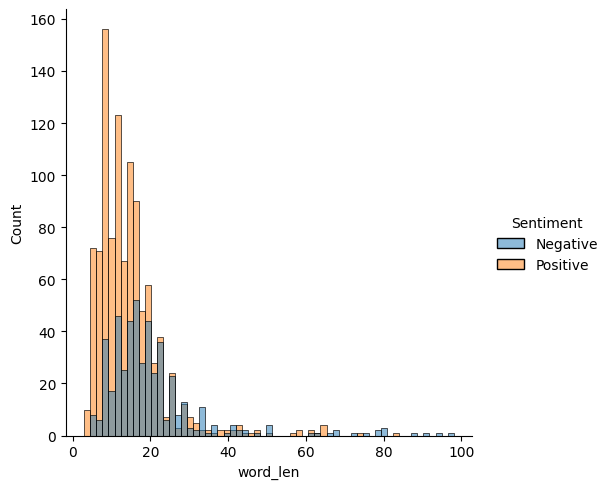

In [ ]:
sns.displot(x = 'word_len', hue = "Sentiment", data = canva)
plt.show()

In [ ]:
canva.loc[canva.word_len==98, "review"]

9    When I started trial everything works pretty w...
Name: review, dtype: object

In [ ]:
canva.loc[9, "review"]

'When I started trial everything works pretty well and so I decided to purchased every month and guess what! Every video I edited and saved was never been save at all even if how many times I tried, it was said was saved but when I check on my files it was not there, never been seen, and all pictures and caption is so blurred! And so I need to screenshoot and crop after so that I can use my edited design! What happen canva? So waste of moneyyyy!!!!!! I hope you can do solve this problem! Please'

In [26]:
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
sentence = canva.loc[9, "review"]
regex = RegexpTokenizer('[a-zA-Z0-9]+')

In [35]:
tokenized = regex.tokenize(sentence)

In [44]:
# Stemming

from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
porter = PorterStemmer()
snow =SnowballStemmer(language = "english", ignore_stopwords = True)
lancaster = LancasterStemmer()

# List for Stemming

stemming_list = ["Running", "Cries", "Leaving",
                 "Playing", "Fasting", "Having", "breath","taking"]

stemmed_porter = [porter.stem(word) for word in stemming_list]
print("Porter: ", stemmed_porter)

stemmed_snow = [snow.stem(word) for word in stemming_list]
print("Snowball: ", stemmed_snow)

stemmed_lnc = [lancaster.stem(word) for word in stemming_list]
print("Lancaster: ", stemmed_lnc)


Porter:  ['run', 'cri', 'leav', 'play', 'fast', 'have', 'breath', 'take']
Snowball:  ['run', 'cri', 'leav', 'play', 'fast', 'having', 'breath', 'take']
Lancaster:  ['run', 'cri', 'leav', 'play', 'fast', 'hav', 'brea', 'tak']


In [47]:
list_random = ["moneyyy", "ooohhh", 'ah']

[lancaster.stem(word) for word in list_random]

['moneyyy', 'ooohhh', 'ah']

In [58]:
# Custom Mapping and Cleaning
corpus = {"moneyyyy!!!!!!": 'money', "ooohhh": "oh", "ah": "ok"}

def mapping(text):
  if text in corpus:
    return(corpus[text])
  else:
    return(text)

list_random = ["moneyyyy", "ooohhh", 'ah']
[mapping(word) for word in list_random]

['moneyyyy', 'oh', 'ok']

In [62]:
text = [mapping(word) for word in sentence]
text = "".join(text)
print(text)

When I started trial everything works pretty well and so I decided to purchased every month and guess what! Every video I edited and saved was never been save at all even if how many times I tried, it was said was saved but when I check on my files it was not there, never been seen, and all pictures and caption is so blurred! And so I need to screenshoot and crop after so that I can use my edited design! What happen canva? So waste of moneyyyy!!!!!! I hope you can do solve this problem! Please


In [69]:
import re
def clean_text(text):
  # remove the hyperlinks, characters
  text = re.sub('(www.+)|(https:.?)|(http:.?)|(@[a-zA-Z]+)|(\W+)|(\s+)', " ", text)
  text = re.sub('[^a-zA-Z0-9]', " ", text)
  text = re.sub('\w+:/\S+', " ", text) # Select the Weblink and remove it
  text = re.sub('\d+', " ", text) # Remove Digits
  text = re.sub('\s+', " ", text).strip() # Remove Extra WhiteLine Space...
  return(text)

canva["review_clean"] = canva.review.apply(clean_text)

In [74]:
import string

noise = string.punctuation
noise+=" "

#canva["review_clean"] = [word for word in canva['review_clean'] if word not in string.punctuation]

In [78]:
# Tokenize
from nltk.tokenize import word_tokenize
words = [word_tokenize(word) for word in canva.review_clean]

In [82]:
# Stopwords
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = stopwords.words("english")

all_tokens = [token for review_token in words for token in review_token \
              if token.lower() not in stopwords]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


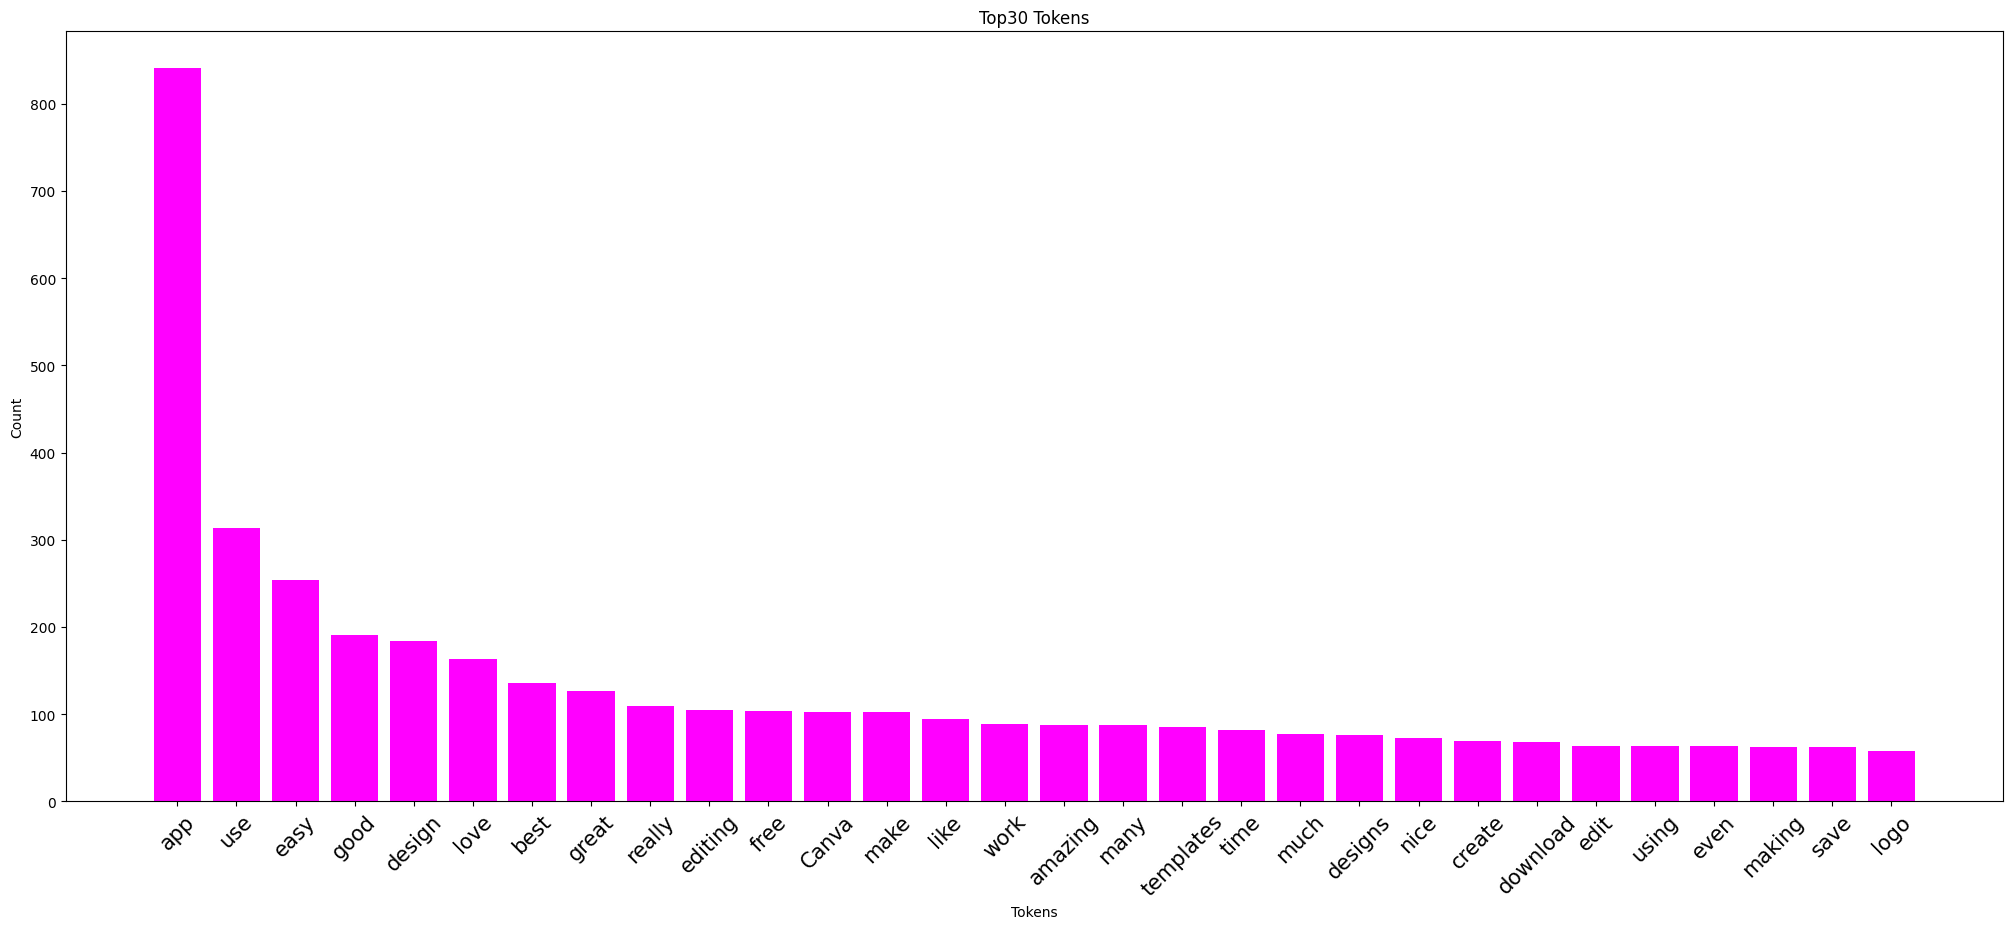

In [93]:
from nltk.probability import FreqDist
df = pd.DataFrame(FreqDist(all_tokens).items(), columns = ["Tokens", "Freq"]).\
sort_values(ascending = False, by = "Freq")

# Plot the top 30 tokens

plt.figure(figsize = (25, 10))
plt.bar(df["Tokens"][:30], df["Freq"][:30], color = "magenta")
plt.title("Top30 Tokens")
plt.xlabel("Tokens")
plt.ylabel("Count")
plt.xticks(rotation = 45, size = 15)
plt.show()

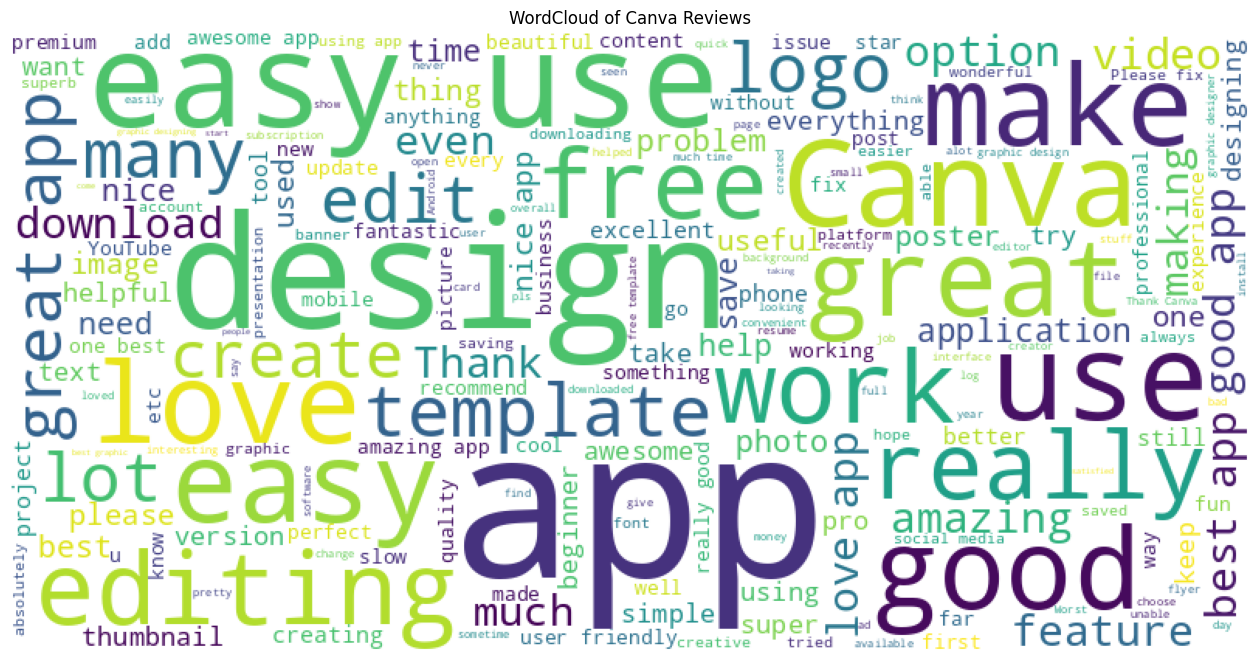

In [99]:
# Word Cloud
from wordcloud import WordCloud

# Generate the WordCloud Image
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").\
generate(' '.join(all_tokens))
plt.figure(figsize = (16, 10))
plt.imshow(wordcloud)
plt.title("WordCloud of Canva Reviews")
plt.axis("off")
plt.show()

### Modeling Code

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(binary = True, min_df = 5, stop_words = "english")

vec = vector.fit_transform(canva["review_clean"]) .todense()

print(vec.shape)

feature_names = vector.get_feature_names_out()

# Bag of Words Structure
pd.DataFrame(vec, columns = feature_names)


# Convert the matrix into an array
array = np.asarray(vec)

(1500, 392)


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()

xtrain, xtest, ytrain, ytest = train_test_split(array, canva.Sentiment, test_size = 0.20,
                                                random_state = 42)

pred = logreg.fit(xtrain, ytrain).predict(xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

    Negative       0.85      0.80      0.82        84
    Positive       0.92      0.94      0.93       216

    accuracy                           0.90       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.90      0.90      0.90       300

